# Analizar los resultados futuros

In [1]:
setwd(r"(C:\Users\AGPRES\INIA_Pucallpa\Contrato_3\Investigacion\03_Suelo_Teledeteccion\Satelite\PUCALLPA\Sentinel2\Bandas\Prediccion_ajuste)")

In [2]:
lista_tif <- list.files(pattern = ".tif")
lista_tif

[1] "Ajuste_Predic_AL.tif"      "Ajuste_Predic_Arcilla.tif"
 [3] "Ajuste_Predic_Arena.tif"   "Ajuste_Predic_BT.tif"     
 [5] "Ajuste_Predic_CA.tif"      "Ajuste_Predic_CE.tif"     
 [7] "Ajuste_Predic_CICe.tif"    "Ajuste_Predic_K.tif"      
 [9] "Ajuste_Predic_Limo.tif"    "Ajuste_Predic_MG.tif"     
[11] "Ajuste_Predic_MO.tif"      "Ajuste_Predic_N.tif"      
[13] "Ajuste_Predic_P.tif"       "Ajuste_Predic_PH.tif"     
[15] "Ajuste_Predic_SAl.tif"

In [3]:
list.files(pattern = "CE.tif")

[1] "Ajuste_Predic_CE.tif"

In [4]:
lista_CE <- list.files(pattern = "CE.tif")
lista_K <- list.files(pattern = "K.tif")
lista_MO <- list.files(pattern = "MO.tif")
lista_P <- list.files(pattern = "P.tif")
lista_PH <- list.files(pattern = "PH.tif")

In [5]:
#install.packages("sf", lib=r"(C:\Program Files\R\R-4.2.2\library)")

In [7]:
library(sp)
library(raster)
library(sf)
library(rgdal)

In [8]:
Banda_CE <- raster(lista_CE[1])
Banda_K <- raster(lista_K[1])
Banda_MO <- raster(lista_MO[1])
Banda_P <- raster(lista_P[1])
Banda_PH <- raster(lista_PH[1])

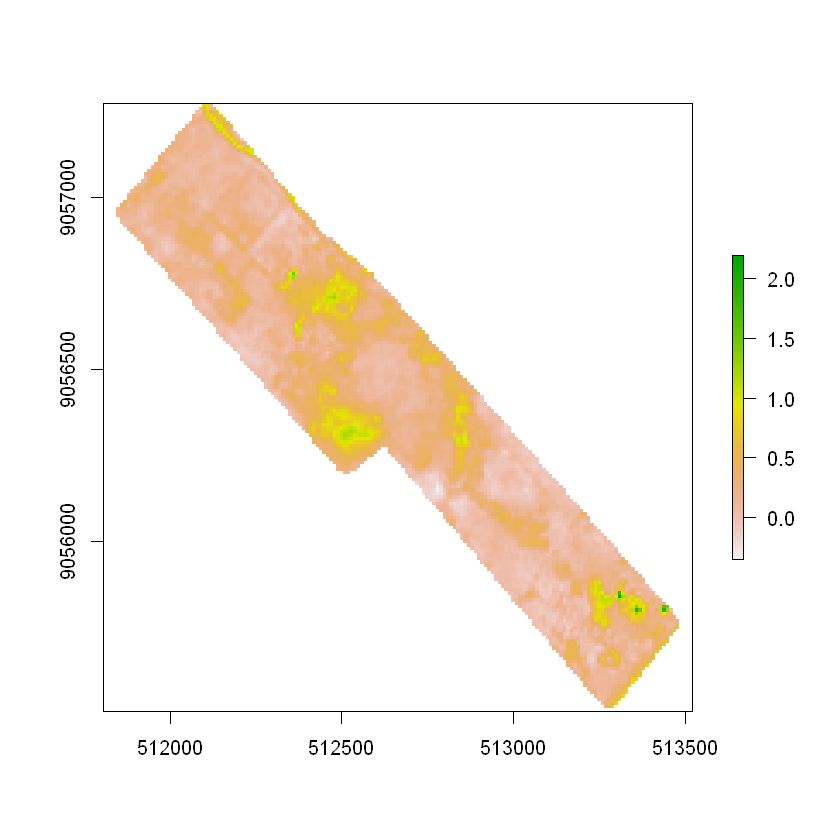

In [9]:
plot(Banda_CE)

## Clasificación pH

|  Rangos   | Valor |
|:-------------------------:|:-----------:|
|       < 5.5 |         0.2     |
|       5.5 - 6.0 |         0.5     |
|       6.0 - 6.5 |         0.8     |
|       6.5 - 7.0 |         1.0     |
|       7.0 - 7.5 |         0.8     |
|  7.5 - 8.0  |     0.5      |
| > 8.0   |           0.2     |


## Clasificación CE

|  Rangos   | Valor |
|:-------------------------:|:-----------:|
|       < 2.0 |         1     |
|       2.0 - 4.0 |         0.8     |
|       4.0 - 8.0 |         0.5     |
| > 8.0   |           0.2     |

## Clasificación MO

|  Rangos   | Valor |
|:-------------------------:|:-----------:|
|       < 0.5 |         0.2     |
|       0.5 - 1.0 |         0.5     |
|       1.0 - 2.0 |         0.8     |
| > 2.0   |          1     |

## Clasificación P

|  Rangos   | Valor |
|:-------------------------:|:-----------:|
|       < 5 |         0.2     |
|       5 - 10.0 |         0.5     |
|       10.0 - 15.0 |         0.8     |
| > 15.0   |          1     |

## Clasificación K

|  Rangos   | Valor |
|:-------------------------:|:-----------:|
|       < 100 |         0.2     |
|       100 - 200.0 |         0.5     |
|       200.0 - 400.0 |         0.8     |
| > 400.0   |          1     |

In [10]:
# Clasificacion en 4 clases
Clase_K <- c(-Inf,100, 0.2,
           100.0, 200.0, 0.5,
           200.0, 400.0, 0.8,
           400.0, Inf, 1)
mat_K <- matrix(Clase_K, ncol = 3, byrow = TRUE)
mat_K

-Inf,100,0.2
100,200,0.5
200,400,0.8
400,Inf,1.0


In [11]:
# Clasificacion en 4 clases
Clase_P <- c(-Inf,5, 0.2,
           5.0, 10.0, 0.5,
           10.0, 15.0, 0.8,
           15.0, Inf, 1)
mat_P <- matrix(Clase_P, ncol = 3, byrow = TRUE)
mat_P

-Inf,5,0.2
5,10,0.5
10,15,0.8
15,Inf,1.0


In [12]:
# Clasificacion en 4 clases
Clase_MO <- c(-Inf,0.5, 0.2,
           0.5, 1.0, 0.5,
           1.0, 2.0, 0.8,
           2.0, Inf, 1)
mat_MO <- matrix(Clase_MO, ncol = 3, byrow = TRUE)
mat_MO

-Inf,0.5,0.2
0.5,1.0,0.5
1.0,2.0,0.8
2.0,Inf,1.0


In [13]:
# Clasificacion en 4 clases
Clase_PH <- c(-Inf,5.5, 0.2,
           5.5, 6.0, 0.5,
           6.0, 6.5, 0.8,
           6.5, 7.0, 1.0,
           7.0, 7.5, 0.8,
           7.5, 8.0, 0.5,
           8.0, Inf, 0.2)
mat_Ph <- matrix(Clase_PH, ncol = 3, byrow = TRUE)
mat_Ph

-Inf,5.5,0.2
5.5,6.0,0.5
6.0,6.5,0.8
6.5,7.0,1.0
7.0,7.5,0.8
7.5,8.0,0.5
8.0,Inf,0.2


In [14]:
# Clasificacion en 4 clases
Clase_ce <- c(-Inf,2.0, 1,
           2.0, 4.0, 0.8,
           4.0, 8.0, 0.5,
           8.0, Inf, 0.2)
mat_ce <- matrix(Clase_ce, ncol = 3, byrow = TRUE)
mat_ce

-Inf,2,1.0
2,4,0.8
4,8,0.5
8,Inf,0.2


In [15]:
summary(Banda_PH)

,Ajuste_Predic_PH
Min.,4.075900
1st Qu.,4.687191
Median,4.877999
3rd Qu.,5.097399
Max.,6.038994
NA's,21191.000000


In [16]:
# Reclasificacion raster
Clasificacion_Banda_Ph <- reclassify(Banda_PH, mat_Ph)
Clasificacion_Banda_CE <- reclassify(Banda_CE, mat_ce)
Clasificacion_Banda_MO <- reclassify(Banda_MO, mat_MO)
Clasificacion_Banda_P <- reclassify(Banda_P, mat_P)
Clasificacion_Banda_K <- reclassify(Banda_K, mat_K)

In [17]:
# Exportar raster
writeRaster(Clasificacion_Banda_K, "Clasificacion_K.tif",
            format="GTiff", overwrite=TRUE)

In [18]:
# Exportar raster
writeRaster(Clasificacion_Banda_P, "Clasificacion_P.tif",
            format="GTiff", overwrite=TRUE)

In [19]:
# Exportar raster
writeRaster(Clasificacion_Banda_Ph, "Clasificacion_Ph.tif",
            format="GTiff", overwrite=TRUE)

In [20]:
writeRaster(Clasificacion_Banda_CE, "Clasificacion_CE.tif",
            format="GTiff", overwrite=TRUE)

In [21]:
writeRaster(Clasificacion_Banda_MO, "Clasificacion_MO.tif",
            format="GTiff", overwrite=TRUE)

In [22]:
# Definimos la paleta de colores segun las 5 clases
mycolor <- c("#b6b2ab","#33b63e","#e0ee1a","#ee0004")

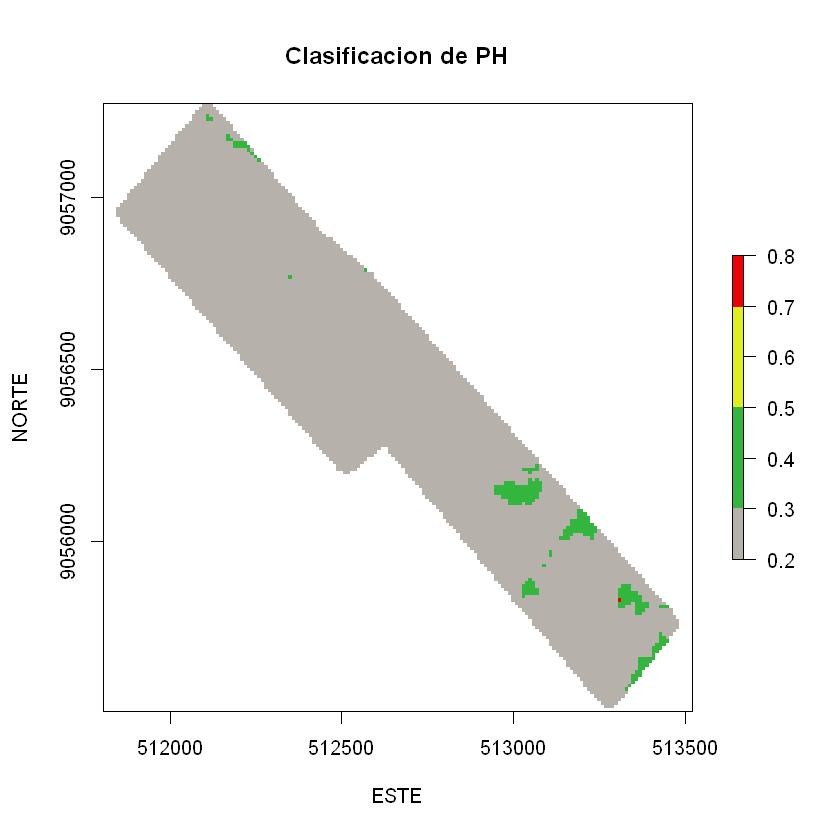

In [23]:
# Visualizar de la clasificacion
plot(Clasificacion_Banda_Ph, main = "Clasificacion de PH",
     axes = TRUE, xlab = "ESTE", ylab = "NORTE", col= mycolor)

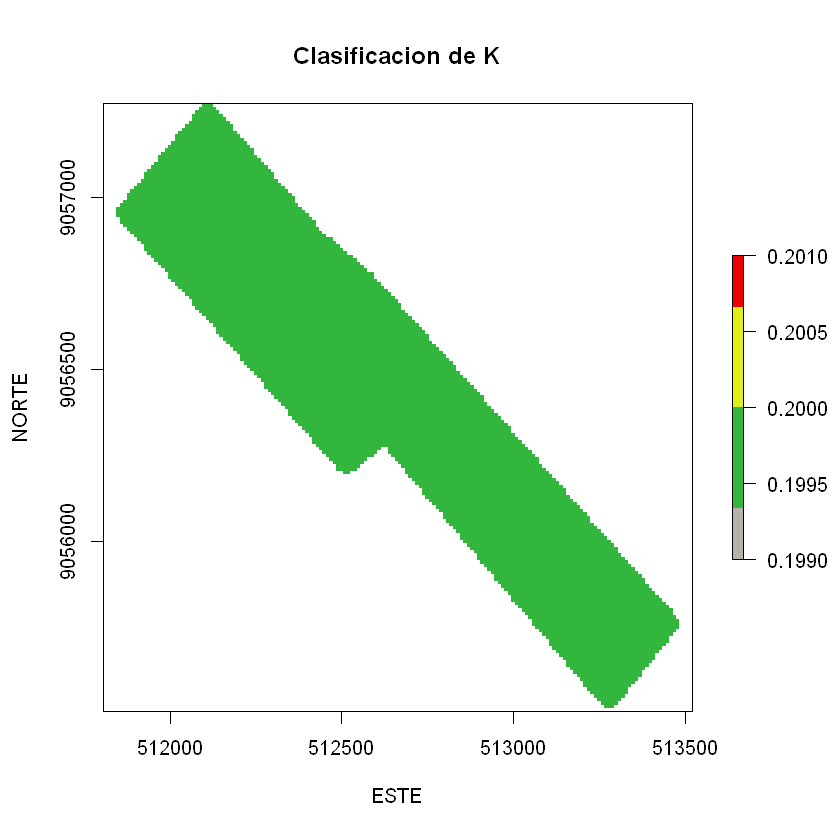

In [24]:
# Visualizar de la clasificacion
plot(Clasificacion_Banda_K, main = "Clasificacion de K",
     axes = TRUE, xlab = "ESTE", ylab = "NORTE", col= mycolor)

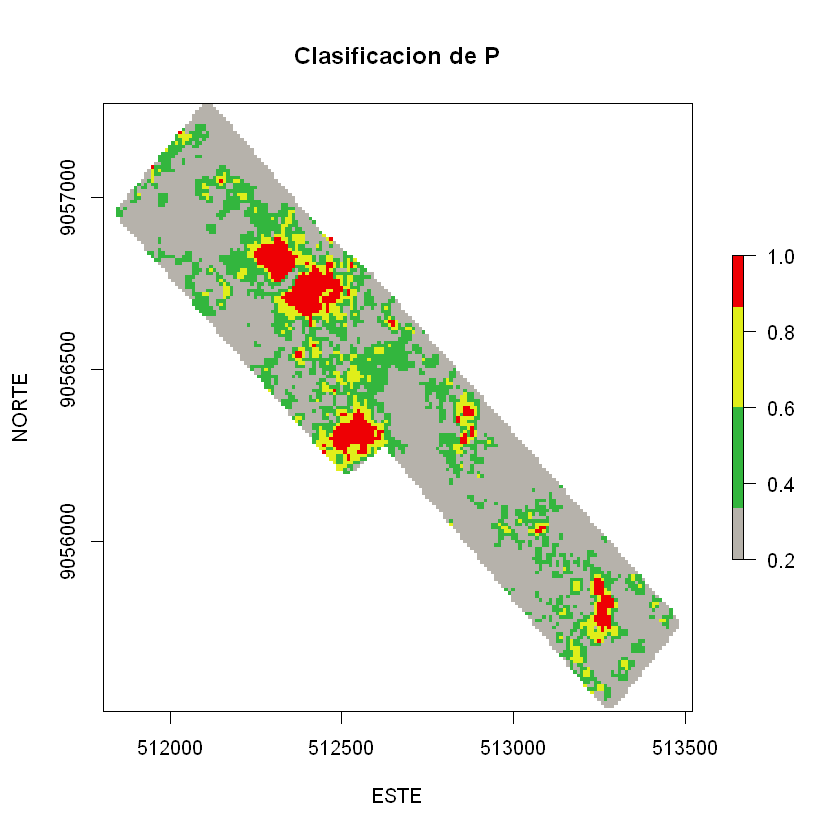

In [25]:
# Visualizar de la clasificacion
plot(Clasificacion_Banda_P, main = "Clasificacion de P",
     axes = TRUE, xlab = "ESTE", ylab = "NORTE", col= mycolor)

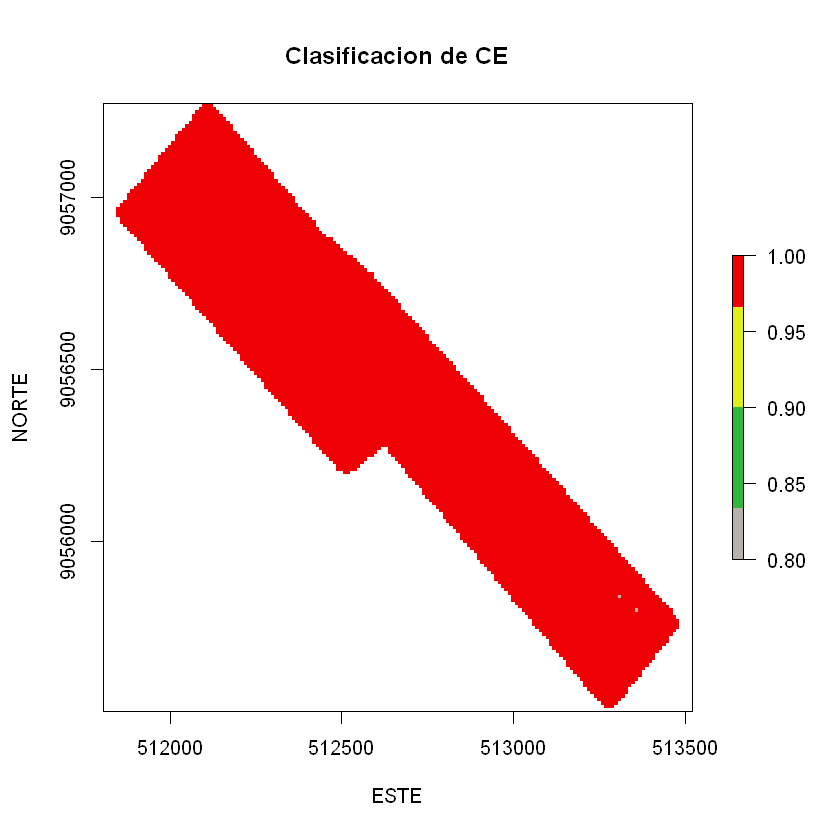

In [26]:
# Visualizar de la clasificacion
plot(Clasificacion_Banda_CE, main = "Clasificacion de CE",
     axes = TRUE, xlab = "ESTE", ylab = "NORTE", col= mycolor)

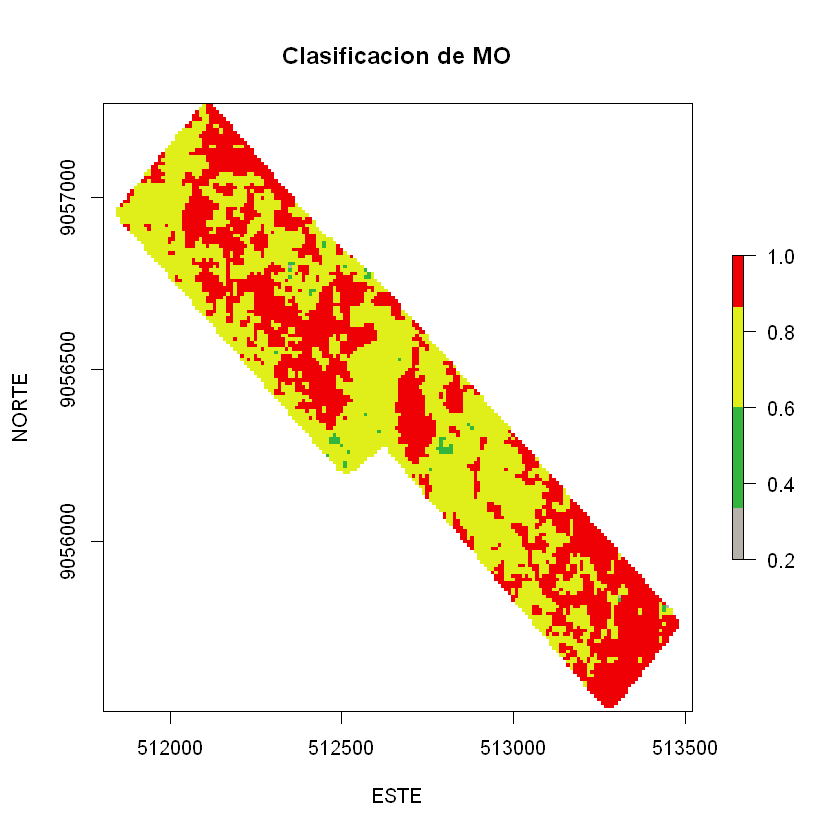

In [27]:
# Visualizar de la clasificacion
plot(Clasificacion_Banda_MO, main = "Clasificacion de MO",
     axes = TRUE, xlab = "ESTE", ylab = "NORTE", col= mycolor)

In [28]:
# Conversion de raster a tabla
tbl_PH <- rasterToPoints(Clasificacion_Banda_Ph, spatial = F)
tabla_PH <- as.data.frame(tbl_PH)

In [29]:
tbl_MO <- rasterToPoints(Clasificacion_Banda_MO, spatial = F)
tabla_MO <- as.data.frame(tbl_MO)

In [30]:
tbl_CE <- rasterToPoints(Clasificacion_Banda_CE, spatial = F)
tabla_CE <- as.data.frame(tbl_CE)

In [31]:
tbl_P <- rasterToPoints(Clasificacion_Banda_P, spatial = F)
tabla_P <- as.data.frame(tbl_P)

In [32]:
tbl_K <- rasterToPoints(Clasificacion_Banda_K, spatial = F)
tabla_K <- as.data.frame(tbl_K)

In [34]:
names(tabla_K)

[1] "x"               "y"               "Ajuste_Predic_K"

In [35]:
names(tabla_PH) <- c("Este", "Norte", "Clase")
names(tabla_MO) <- c("Este", "Norte", "Clase")
names(tabla_CE) <- c("Este", "Norte", "Clase")
names(tabla_P) <- c("Este", "Norte", "Clase")
names(tabla_K) <- c("Este", "Norte", "Clase")

In [36]:
# Visualizacion de la tabla
head(tabla_K)

,Este,Norte,Clase
,<dbl>,<dbl>,<dbl>
1,512098.3,9057269,0.2
2,512108.3,9057269,0.2
3,512118.3,9057269,0.2
4,512088.3,9057259,0.2
5,512098.3,9057259,0.2
6,512108.3,9057259,0.2


In [37]:
unique(tabla_K$Clase)

[1] 0.2

In [39]:
library(dplyr)

In [40]:
# Sumatoria
conteo_tabla_PH <- summarise(group_by(tabla_PH, Clase),count = n())
conteo_tabla_MO <- summarise(group_by(tabla_MO, Clase),count = n())
conteo_tabla_CE <- summarise(group_by(tabla_CE, Clase),count = n())
conteo_tabla_P <- summarise(group_by(tabla_P, Clase),count = n())
conteo_tabla_K <- summarise(group_by(tabla_K, Clase),count = n())

In [41]:
# pixel a hectarea
Datos_area_PH <- mutate(conteo_tabla_PH, metros = count*(10)^2, 
                     has = metros/10000, porcentaje = (has/sum(has))*100)
Datos_area_MO <- mutate(conteo_tabla_MO, metros = count*(10)^2, 
                     has = metros/10000, porcentaje = (has/sum(has))*100)
Datos_area_CE <- mutate(conteo_tabla_CE, metros = count*(10)^2, 
                     has = metros/10000, porcentaje = (has/sum(has))*100)
Datos_area_P <- mutate(conteo_tabla_P, metros = count*(10)^2, 
                     has = metros/10000, porcentaje = (has/sum(has))*100)
Datos_area_K <- mutate(conteo_tabla_K, metros = count*(10)^2, 
                     has = metros/10000, porcentaje = (has/sum(has))*100)

In [42]:
Datos_area_CE

Clase,count,metros,has,porcentaje
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.8,2,200,0.02,0.02551997
1.0,7835,783500,78.35,99.97448003


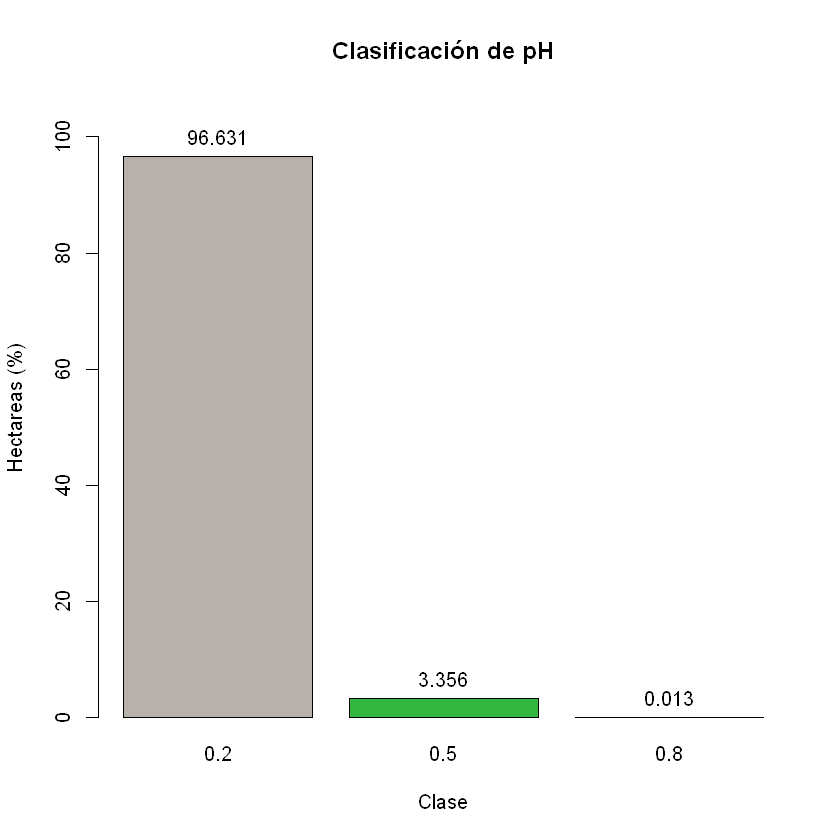

In [43]:
# Graficar datos perdida bosque
barra <- barplot(Datos_area_PH$porcentaje, 
                 col = mycolor, 
                 names.arg = Datos_area_PH$Clase,
                 main = "Clasificación de pH",
                 xlab = "Clase", 
                 ylab = "Hectareas (%)",
                 ylim = c(0, max(Datos_area_PH$porcentaje) + 10))

text(x = barra, y = Datos_area_PH$porcentaje, pos=3, cex=1,
     label = round(Datos_area_PH$porcentaje, 3))

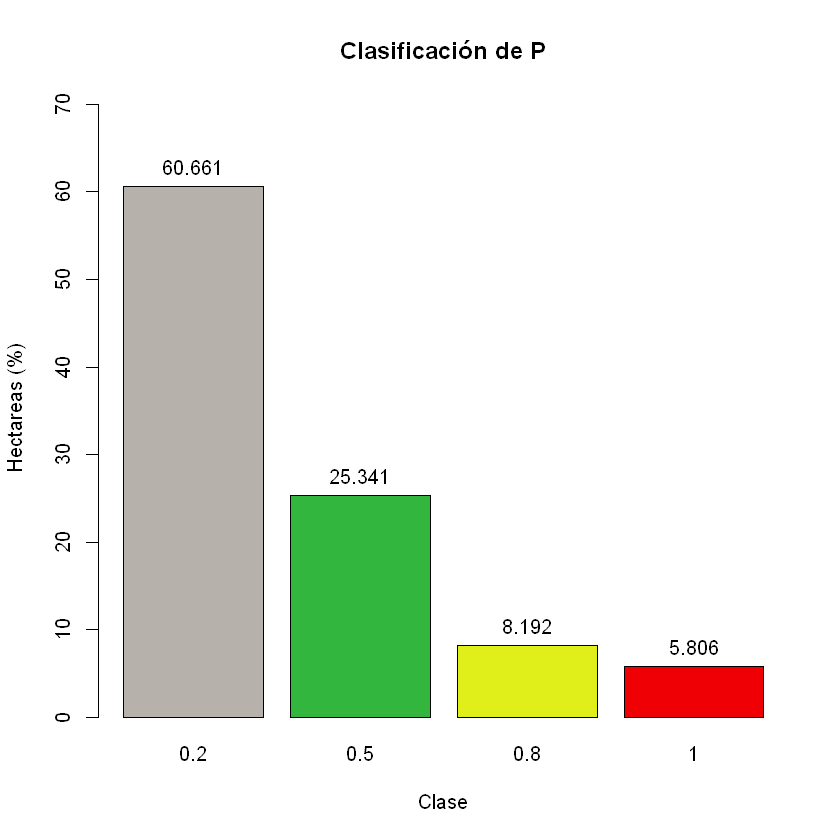

In [44]:
# Graficar datos perdida bosque
barra <- barplot(Datos_area_P$porcentaje, 
                 col = mycolor, 
                 names.arg = Datos_area_P$Clase,
                 main = "Clasificación de P",
                 xlab = "Clase", 
                 ylab = "Hectareas (%)",
                 ylim = c(0, max(Datos_area_P$porcentaje) + 10))

text(x = barra, y = Datos_area_P$porcentaje, pos=3, cex=1,
     label = round(Datos_area_P$porcentaje, 3))

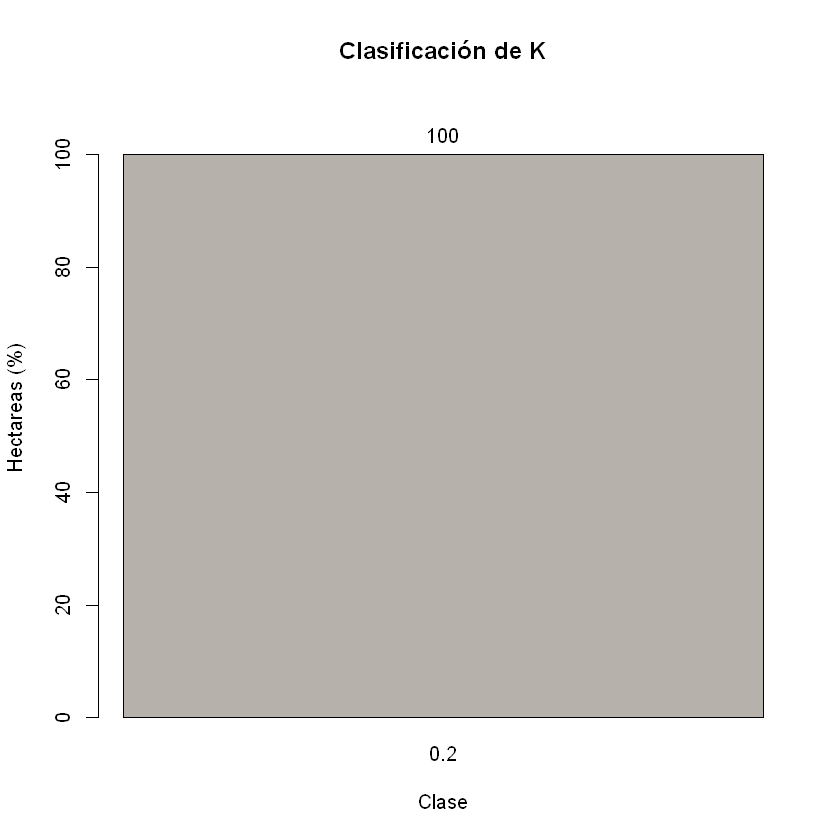

In [45]:
# Graficar datos perdida bosque
barra <- barplot(Datos_area_K$porcentaje, 
                 col = mycolor, 
                 names.arg = Datos_area_K$Clase,
                 main = "Clasificación de K",
                 xlab = "Clase", 
                 ylab = "Hectareas (%)",
                 ylim = c(0, max(Datos_area_K$porcentaje) + 10))

text(x = barra, y = Datos_area_K$porcentaje, pos=3, cex=1,
     label = round(Datos_area_K$porcentaje, 3))

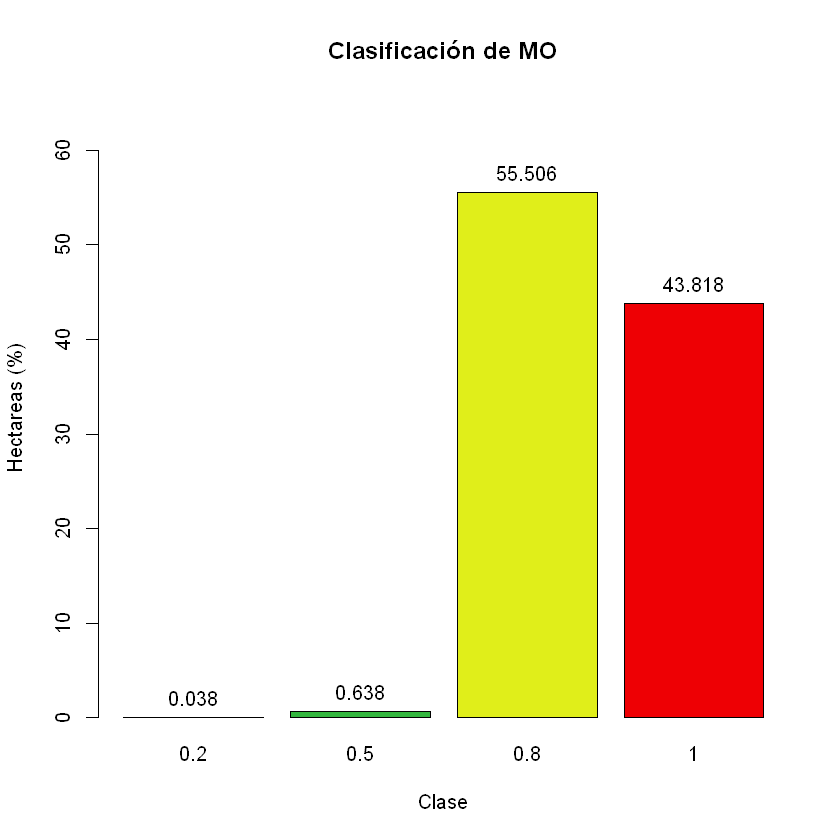

In [46]:
# Graficar datos perdida bosque
barra <- barplot(Datos_area_MO$porcentaje, 
                 col = mycolor, 
                 names.arg = Datos_area_MO$Clase,
                 main = "Clasificación de MO",
                 xlab = "Clase", 
                 ylab = "Hectareas (%)",
                 ylim = c(0, max(Datos_area_MO$porcentaje) + 10))

text(x = barra, y = Datos_area_MO$porcentaje, pos=3, cex=1,
     label = round(Datos_area_MO$porcentaje, 3))

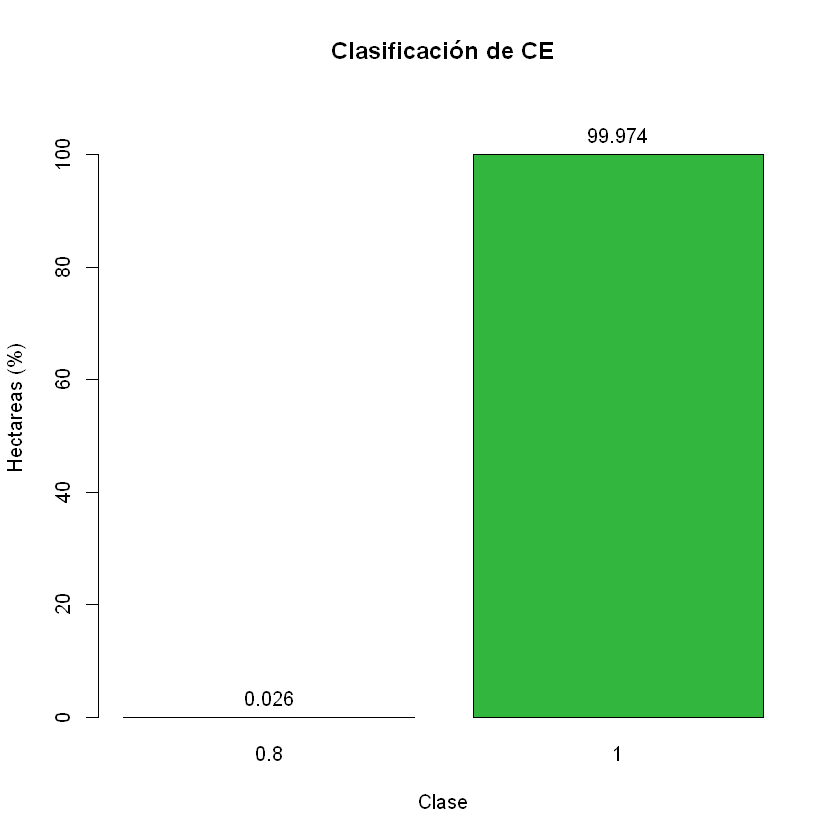

In [47]:
# Graficar datos perdida bosque
barra <- barplot(Datos_area_CE$porcentaje, 
                 col = mycolor, 
                 names.arg = Datos_area_CE$Clase,
                 main = "Clasificación de CE",
                 xlab = "Clase", 
                 ylab = "Hectareas (%)",
                 ylim = c(0, max(Datos_area_CE$porcentaje) + 10))

text(x = barra, y = Datos_area_CE$porcentaje, pos=3, cex=1,
     label = round(Datos_area_CE$porcentaje, 3))

In [48]:
# Exportacion tabla
write.csv(Datos_area_PH, file = "Datos_clasificacion_PH.csv", row.names = T)
write.csv(Datos_area_MO, file = "Datos_clasificacion_MO.csv", row.names = T)
write.csv(Datos_area_CE, file = "Datos_clasificacion_CE.csv", row.names = T)
write.csv(Datos_area_P, file = "Datos_clasificacion_P.csv", row.names = T)
write.csv(Datos_area_K, file = "Datos_clasificacion_K.csv", row.names = T)